<a href="https://colab.research.google.com/github/Annmodels/mnist_recon/blob/master/GDMnistL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt


In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist_data = input_data.read_data_sets("./data",one_hot = True)

In [0]:
no_train = mnist_data.train.num_examples
no_test = mnist_data.test.num_examples
no_val = mnist_data.validation.num_examples
#print("Train samples : {0}, Test : {1},Val : {2}" no_train )
print(no_train)
print(no_test)
print(no_val)

In [0]:
input = 784
hidden1 = 642
hidden2 = 521
hidden3 = 410
hidden4 = 305
hidden5 = 200
hidden6 = 100
output = 10


In [0]:
learningrate = 1e-3
print(learningrate)
epochs = 30000
batchsize = 100
keep_prob = tf.placeholder(tf.float32)

In [0]:
x = tf.placeholder(tf.float32,[None,input])
y = tf.placeholder(tf.float32,[None,output])

In [0]:
weights = { "w1":tf.Variable(tf.truncated_normal([input,hidden1],stddev = 0.1)),
           "w2":tf.Variable(tf.truncated_normal([hidden1,hidden2],stddev = 0.1)),
           "w3":tf.Variable(tf.truncated_normal([hidden2,hidden3],stddev = 0.1)),
           "w4":tf.Variable(tf.truncated_normal([hidden3,hidden4],stddev = 0.1)),
           "w5":tf.Variable(tf.truncated_normal([hidden4,hidden5],stddev = 0.1)),
           "w6":tf.Variable(tf.truncated_normal([hidden5,hidden6],stddev = 0.1)),
           "wout":tf.Variable(tf.truncated_normal([hidden6,output],stddev = 0.1))}

In [0]:
bias = {"b1":tf.Variable(tf.truncated_normal([hidden1],stddev = 0.1)),
        "b2":tf.Variable(tf.truncated_normal([hidden2],stddev = 0.1)),
        "b3":tf.Variable(tf.truncated_normal([hidden3],stddev = 0.1)),
        "b4":tf.Variable(tf.truncated_normal([hidden4],stddev = 0.1)),
        "b5":tf.Variable(tf.truncated_normal([hidden5],stddev = 0.1)),
        "b6":tf.Variable(tf.truncated_normal([hidden6],stddev = 0.1)),
        "output":tf.Variable(tf.truncated_normal([output],stddev = 0.1))}

In [0]:
layer1 = tf.add(tf.matmul(x,weights["w1"]),bias["b1"])
ld12 = tf.nn.dropout(layer1,keep_prob = 0.7)
layer2 = tf.add(tf.matmul(ld12,weights["w2"]),bias["b2"])
ld23 = tf.nn.dropout(layer2,keep_prob = 0.9)
layer3 = tf.add(tf.matmul(layer2,weights["w3"]),bias["b3"])
ld34 = tf.nn.dropout(layer3,keep_prob = 0.9)
layer4 = tf.add(tf.matmul(layer3,weights["w4"]),bias["b4"])
ld45 = tf.nn.dropout(layer4,keep_prob = 1.0)
layer5 = tf.nn.relu(tf.add(tf.matmul(layer4,weights["w5"]),bias["b5"]))
ld56 = tf.nn.dropout(layer5,keep_prob = 1.0)
layer6 = tf.nn.relu(tf.add(tf.matmul(layer5,weights["w6"]),bias["b6"]))
layerdrop = tf.nn.dropout(layer6,keep_prob = 1.0)
layerout = tf.nn.relu(tf.add(tf.matmul(layerdrop,weights["wout"]),bias["output"]))

In [0]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = layerout,labels = y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learningrate).minimize(loss)
prediction = tf.equal(tf.argmax(layerout,1),tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(prediction,tf.float32))
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [0]:
with tf.Session() as sess:
  sess.run(init)
  for i in range (epochs):
    mx,my = mnist_data.train.next_batch(batchsize)
    mvx,mvy = mnist_data.validation.next_batch(batchsize)
    sess.run(optimizer,feed_dict = {x:mx,y:my,keep_prob:1})
    if i%100 == 0:
      mloss,macc = sess.run([loss,accuracy],feed_dict = {x:mx,y:my,keep_prob:1})
      mvloss,mvacc = sess.run([loss,accuracy],feed_dict = {x:mvx,y:mvy,keep_prob:1})
      print("It:{0} ,  Tloss= {1} ,  Tacc = {2} ,  Vloss = {3},Vacc = {4}".format(i,mloss,macc,mvloss,mvacc))
      testacc = sess.run(accuracy, feed_dict = {x:mnist_data.test.images , y:mnist_data.test.labels, keep_prob:1.0})
      print("Testacc {0}".format(testacc))
      saverpath = saver.save(sess,"./model/my_model.ckpt")


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
(784,)


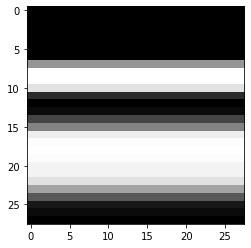

(28, 28)
(1, 784)


In [0]:
i = 86
vx = mnist_data.test.images
vy = mnist_data.test.labels
print(vy[i])
img = vx[i]
print(img.shape)
#grayed = cv2.cvtColor? #(ors, cv2.COLOR_BGR2GRAY)
rescaled = cv2.resize(vx[i],(28,28))
plt.imshow(rescaled,cmap = 'gray')
plt.show()
print(rescaled.shape)
dum = img.reshape(1,-1)/255
print(dum.shape)

In [0]:
with tf.Session() as sess:
  saver.restore(sess,"./model/my_model.ckpt")
  z = layerout.eval(feed_dict = {x:dum,keep_prob:1.0})
  print(z) 
  ypred = np.argmax(z,axis = 1)
  print("pred  {0}".format(ypred))

INFO:tensorflow:Restoring parameters from ./model/my_model.ckpt
[[0.         0.         0.         0.         0.01892349 0.79423773
  0.14847265 1.1447141  0.         0.5850062 ]]
pred  [7]
